## What will you learn from this project?
* Bivariate Analysis
* Sunburst and World Map Charts
* Comparison of Features
* Exploratory Data Analysis(EDA)

## Introduction
* **The Space Race** was a 20th-century competition between two Cold War adversaries, the Soviet Union (USSR) and the United States(US), to achieve superior spaceflight capability
* ıt had iths origins in the ballistic missile-based nuclear arms race between the two nations flowwing World War 2.
* The tecnological advatage demostrated by spacelight achievemnt was seen as necessary for national security, and became part of the  symbolism and ideology of the time. The Space Race brought pioneering launches of artifical satellites, robotic space probes to the Moon, Venus, and Mars, and human spacelight in low Earth orbit and ultimately to the Moon.
* 4 October 1957: The USSR succesfully launches, Sputnik 1, the first Earth-orbiting satellite in history. 3 Nowember 1957: The USSR successfully launches Sputnik 2, carrying a dog named Laika into space. They become the first nation to successfully send a living organism into orbit.
* Detailed information: https://nextspaceflight.com/
* 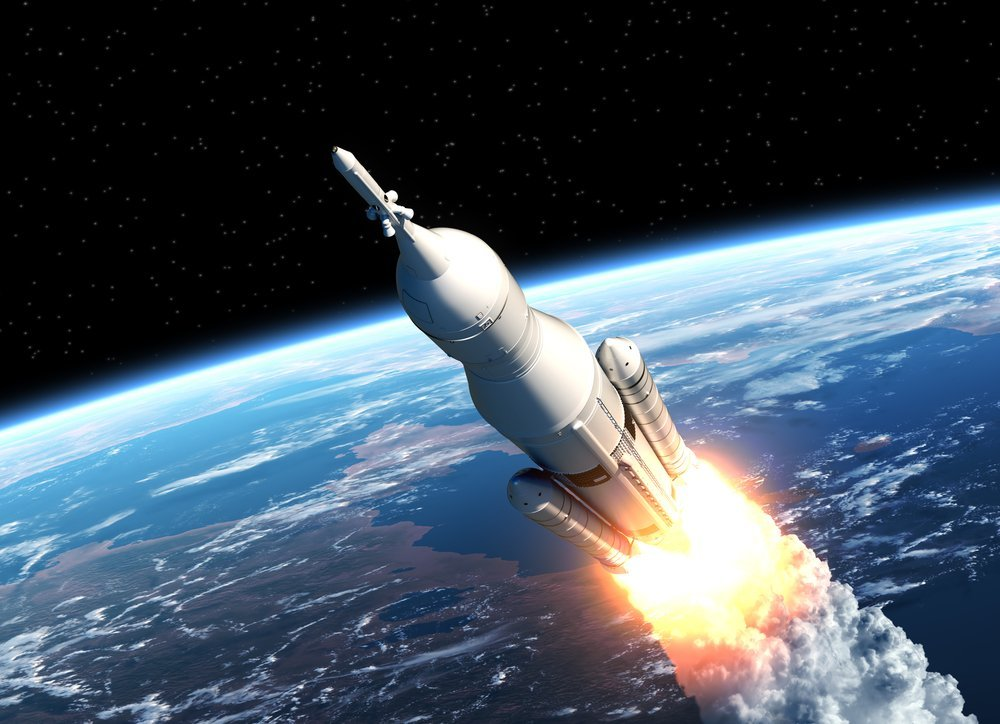

## Analysis Content

1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analtsis Data](#3)
1. [Number of Launches by Every Company](#4)
1. [Rocket Status](#5)
1. [Mission Status](#6)  
1. [Rocket Cost Distribution with Rocket Status](#7)
1. [Rocket Cost Distribution with Mission Status](#8)
1. [Total Spent Money for each Companies](#9)
1. [Mission Numbers by Year](#10)

<a id=1></a>
## Python Libraries

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


<a id=2></a>
## Data Content
* **Company Name:** Company
* **Lacotion:** Location of the Launch
* **Datum:** Datum and Time of Launch
* **Detail:** Rocet Name
* **Status Rocekt:** Status of the rocet
* **Rocet:** Cost of the mission: in $ million
* **Status Mission:** Status of the mission


<a id=3></a>
## Read and Analtsis Data

In [27]:
df= pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")

In [28]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [29]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [30]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [31]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


<a id=4></a>
## Number of Launches by Every Company

In [33]:
ds = df["Company Name"].value_counts().reset_index()[:28]
ds

,index,Company Name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [34]:
fig = go.Figure(go.Bar(x=ds["index"],
                      y=ds["Company Name"],
                      marker = dict( color = ds["Company Name"],
                                   colorscale = "bluered")))
fig.update_layout(title = "Number of Launches by Every Company",
                 xaxis_title ="Top 28 Country", yaxis_title="count", hovermode="x")

<a id=5></a>
## Rocet Status

In [35]:
ds=df["Status Rocket"].value_counts().reset_index()
ds

,index,Status Rocket
0,StatusRetired,3534
1,StatusActive,790


In [36]:
fig = px.pie(ds, values = "Status Rocket", names ="index" , title="Rocket Status")
fig.show()

<a id=6></a>
## Mission Status

In [37]:
ds =df["Status Mission"].value_counts().reset_index()[:3]
ds

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102


In [38]:
fig = px.bar(ds, x="index",y="Status Mission",title="Mission Status")
fig.show()

<a id=7></a>
## Rocket Cost Distribution with Rocket Status

In [39]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [40]:
df_ = df.dropna(subset=[" Rocket"], axis="rows")
len(df_)

964

In [41]:
np.sum(pd.isna(df_.loc[:," Rocket"]))

0

In [42]:
df_.loc[:," Rocket"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [43]:
df_.loc[:, " Rocket"]=df_.loc[:," Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"]=df_.loc[:, " Rocket"].astype(np.float64)

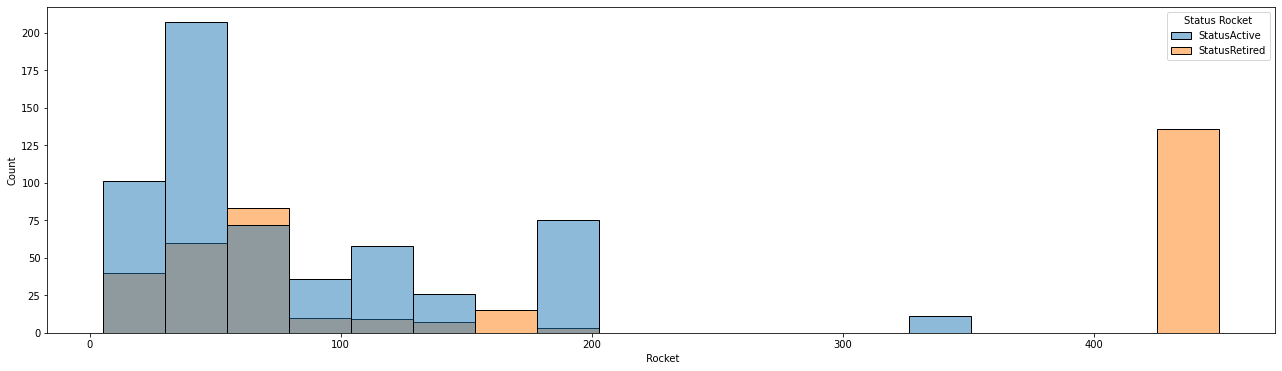

In [44]:
df_d =df_[df_.loc[: , " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data =df_d, x= " Rocket",hue="Status Rocket")
plt.show()

<a id=8></a>
## Rocket Cost Distribution with Mission Status

In [46]:
np.sum(pd.isna(df.loc[:,"Status Mission"]))

0

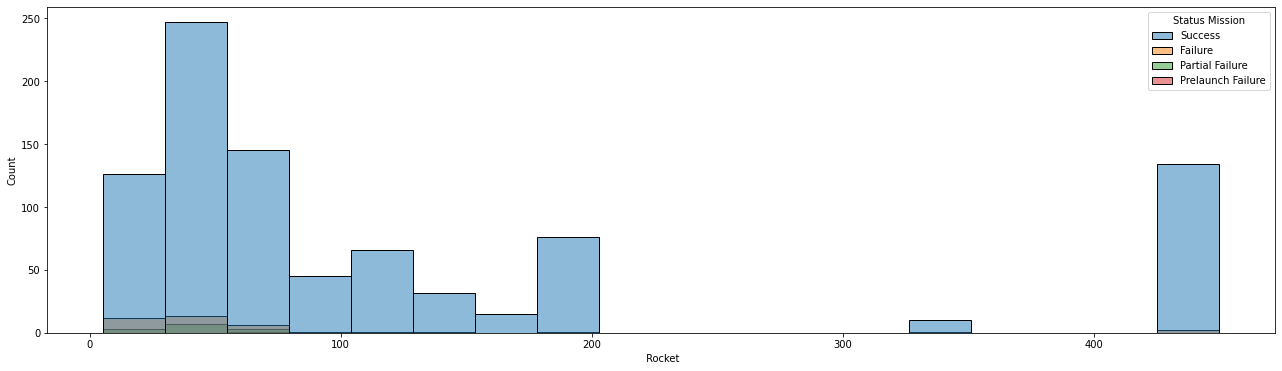

In [48]:
plt.figure(figsize = (22,6))
sns.histplot(data =df_d, x= " Rocket",hue="Status Mission")
plt.show()

<a id=9></a>**
## Total Spent Money for each Companies

In [49]:
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [52]:
df_money=df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money=df_money[df_money[" Rocket"]>0]
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00


In [56]:
df_money_=df_money.sort_values(by = [" Rocket"], ascending = False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,76280.00
0,Arianespace,16345.00
21,ULA,14798.00
16,RVSN USSR,10000.00
2,CASC,6340.26


In [57]:
fig=px.bar(df_money_,x= "Company Name",y=" Rocket",title= "Totle Spent Money for each Company")
fig.show()

<a id=11></a>
## Mission Numbers by Years

In [59]:
df["date"]=pd.to_datetime(df["Datum"])
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [61]:
df["year"] = df["date"].apply(lambda datetime: datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020


In [64]:
ds = df["year"].value_counts().reset_index()
ds

,index,year
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [65]:
fig=px.bar(ds, x="index",y="year" , title=" Missions Number by Year")
fig.show()